In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta


import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene
from scipy.stats import ttest_1samp

In [50]:
try:
    df = pd.read_csv(r"C:\Users\mitch\OneDrive\Documenten\Studie Toegepaste wiskunde\Moduleren project\GBS_MOD_12082024.csv", sep = ';')
except:
    df = pd.read_csv(r"C:\Users\Chong\Desktop\Modelleren project\info\GBS_MOD_12082024.csv", sep = ';')
    

In [51]:
#df = pd.read_csv(r"C:\Users\Chong\Desktop\Modelleren project\info\GBS_MOD_12082024.csv", sep = ';')

In [52]:
df

,Patientcode,Age,Sex,MRC_sum_e,MRC_sum_w1,CNI_e,CNI_Bulbar_e,CNI_Facial_e,CNI_Oculomotor_e,CNI_w1,...,Comorbidity_respiration,Days_between_onset_and_admission,Date_onset_weakness,Continent,Country_of_inclusion,Surv_days,Surv_status,Surv_unable_to_walk,Walking_again,Deceased
0,P0001,75.0,0,50.0,53.0,1.0,0.0,0.0,1.0,1.0,...,0.0,5.0,16-6-2016,1,5,125.0,1.0,1,1.0,0
1,P0002,22.0,0,50.0,46.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,22-11-2017,5,19,49.0,1.0,1,1.0,0
2,P0003,63.0,0,40.0,53.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,28-12-2020,2,11,752.0,0.0,1,NaN,0
3,P0004,30.0,1,60.0,59.0,1.0,1.0,1.0,1.0,1.0,...,0.0,10.0,30-3-2020,1,6,13.0,1.0,1,1.0,0
4,P0005,48.0,1,39.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,28-12-2015,1,2,14.0,0.0,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,P1496,52.0,1,19.0,NaN,0.0,0.0,0.0,0.0,NaN,...,0.0,12.0,4-9-2016,1,5,26.0,0.0,1,NaN,0
1496,P1497,66.0,0,54.0,55.0,1.0,1.0,1.0,0.0,0.0,...,0.0,9.0,4-2-2017,1,1,30.0,1.0,1,1.0,0
1497,P1498,67.0,0,33.0,46.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,30-4-2017,6,21,42.0,1.0,1,1.0,0
1498,P1499,35.0,1,1.0,3.0,1.0,1.0,0.0,0.0,1.0,...,0.0,5.0,3-10-2017,3,13,280.0,1.0,1,1.0,0


In [53]:
# df.columns

In [54]:
# a =  df[['Surv_status', 'Deceased']]

In [55]:
# df.dtypes

In [56]:

# past de datum naar yyyy-mm-dd
# dan selecteer dan mm om de correlatie te bepalen met andere data
df['date_sickness'] = pd.to_datetime(df['Date_onset_weakness'], format = "%d-%m-%Y")
df['date_month'] = df['date_sickness'].dt.month

In [57]:
df = df.drop(columns = ['Patientcode','Date_onset_weakness'])
df['CSF_protein_level'] = df['CSF_protein_level'].str.replace(',','.').astype(float)

#df['Walking_again'] = df['Walking_again'].fillna(0)


In [58]:

corr_matrix = df.corr()
sorted_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).unstack().sort_values(ascending=False)
sorted_corr

Country_of_inclusion  Continent                0.912135
MRC_sum_w1            MRC_sum_e                0.813435
Surv_unable_to_walk   GBSDS_e                  0.766703
GBSDS_w1              GBSDS_e                  0.762471
CNI_Oculomotor_w1     CNI_Oculomotor_e         0.758196
                                                 ...   
date_month            Ant_event_respiratory         NaN
                      Ant_event_vaccination         NaN
                      Ant_event_other               NaN
                      Walking_again                 NaN
                      date_month                    NaN
Length: 1369, dtype: float64

In [59]:
a = df.corr()['date_month'].sort_values(ascending=False)
print(a)


date_month                          1.000000
Country_of_inclusion                0.042215
Continent                           0.042008
CSF_protein_level                   0.034668
Deceased                            0.032537
Comorbidity_respiration             0.028531
GBSDS_w1                            0.027320
Sens_deficits_e                     0.024639
date_sickness                       0.016433
Able_to_walk_e                      0.014984
Surv_status                         0.009699
GBSDS_e                             0.007570
Sens_deficits_w1                    0.004381
Pain_e                              0.003648
Days_between_onset_and_admission    0.000450
Pain_w1                             0.000274
CNI_Bulbar_w1                      -0.000925
CNI_Bulbar_e                       -0.005650
Surv_unable_to_walk                -0.007161
Surv_days                          -0.012387
Able_to_walk_w1                    -0.013766
CNI_e                              -0.017687
CNI_Facial

In [60]:
df['Continent'].value_counts()

Continent
1    878
2    178
5    176
4    164
3     71
6     33
Name: count, dtype: int64

In [61]:
df['Country_of_inclusion'].value_counts(sort=True)

Country_of_inclusion
1     196
19    176
11    161
6     160
5     130
2     129
7     102
18     66
15     63
3      60
13     51
8      40
10     34
17     28
21     25
4      18
12     17
14     16
9      16
16      6
20      6
Name: count, dtype: int64

<Axes: xlabel='Country_of_inclusion', ylabel='count'>

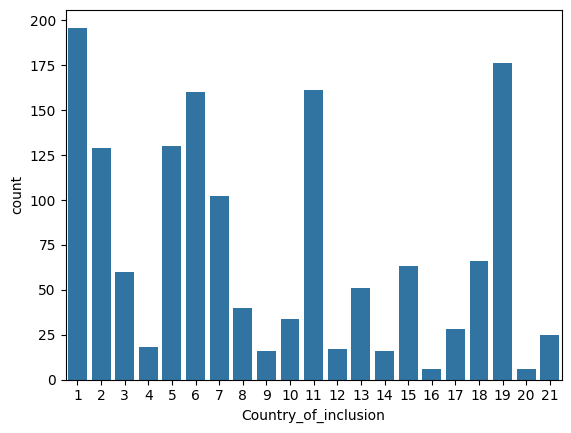

In [62]:
# sns.countplot(df,x='Continent')
sns.countplot(data  =df,x='Country_of_inclusion')

In [63]:
data = {
    'country_code': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'country_name': ['Nederland', 'Verenigd Koninkrijk', 'Duitsland', 'België', 'Denemarken', 
                     'Italië', 'Spanje', 'Frankrijk', 'Griekenland', 'Zwitserland', 
                     'Verenigde Staten', 'Canada', 'Argentinië', 'Brazilië', 'Japan', 
                     'Taiwan', 'Maleisië', 'China', 'Bangladesh', 'Australië', 'Zuid-Afrika']
}


df_klimaat = pd.DataFrame(data)

climate_data = {
    'A_Klimaat': ['Maleisië', 'Bangladesh', 'Brazilië'],
    'B_Klimaat': ['Spanje'],
    'C_Klimaat': ['Nederland', 'Verenigd Koninkrijk', 'België', 'Denemarken', 'Duitsland', 'Frankrijk', 'Italië', 'Griekenland', 'Zwitserland', 'Argentinië', 'Japan', 'Taiwan', 'China', 'Australië', 'Zuid-Afrika'],
    'D_Klimaat': ['Verenigde Staten', 'Canada']
}

# Function to assign the climate category based on the country
def assign_climate(country):
    if country in climate_data['A_Klimaat']:
        return 'A Klimaat'
    elif country in climate_data['B_Klimaat']:
        return 'B Klimaat'
    elif country in climate_data['C_Klimaat']:
        return 'C Klimaat'
    elif country in climate_data['D_Klimaat']:
        return 'D Klimaat'
    else:
        return 'Unknown'

# Add a new column 'Climate' to the dataframe
df_klimaat['klimaat'] = df_klimaat['country_name'].apply(assign_climate)


print(df_klimaat)


    country_code         country_name    klimaat
0              1            Nederland  C Klimaat
1              2  Verenigd Koninkrijk  C Klimaat
2              3            Duitsland  C Klimaat
3              4               België  C Klimaat
4              5           Denemarken  C Klimaat
5              6               Italië  C Klimaat
6              7               Spanje  B Klimaat
7              8            Frankrijk  C Klimaat
8              9          Griekenland  C Klimaat
9             10          Zwitserland  C Klimaat
10            11     Verenigde Staten  D Klimaat
11            12               Canada  D Klimaat
12            13           Argentinië  C Klimaat
13            14             Brazilië  A Klimaat
14            15                Japan  C Klimaat
15            16               Taiwan  C Klimaat
16            17             Maleisië  A Klimaat
17            18                China  C Klimaat
18            19           Bangladesh  A Klimaat
19            20    

In [64]:
# df en df_klimaat joinen op elkaar
df = pd.merge(df, df_klimaat, 
                     left_on='Country_of_inclusion', right_on='country_code',
                     how = 'left')

df = df.drop(columns = 'country_code')

<Axes: xlabel='klimaat', ylabel='count'>

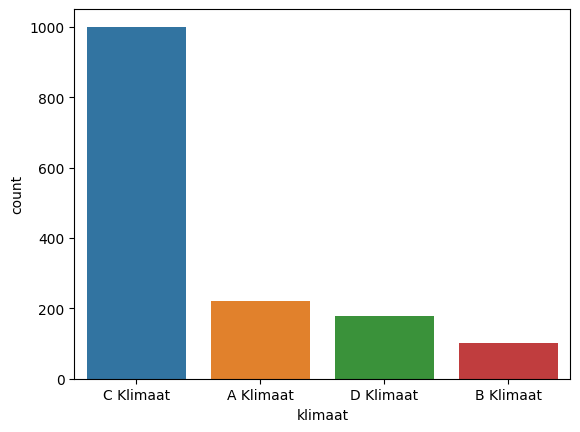

In [65]:

sns.countplot(data = df,x='klimaat', hue = 'klimaat')

In [66]:
df['klimaat'].value_counts()

klimaat
C Klimaat    1000
A Klimaat     220
D Klimaat     178
B Klimaat     102
Name: count, dtype: int64

Text(0.5, 1.0, 'Verdeling hoeveelheid GBS per hafrond')

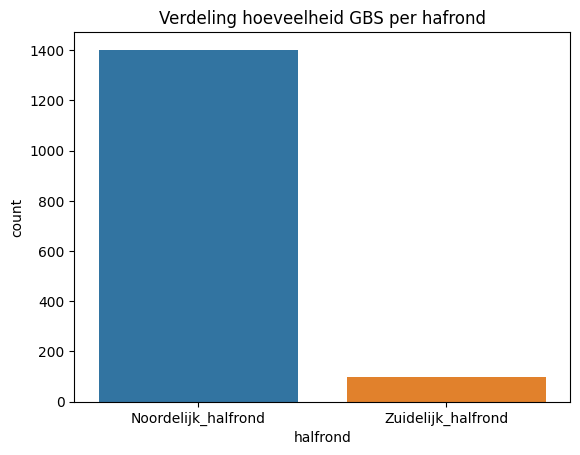

In [67]:
halfrond_data = {
    'Noordelijk_halfrond': ['Nederland', 'Verenigd Koninkrijk', 'Duitsland', 'België', 'Denemarken', 
                     'Italië', 'Spanje', 'Frankrijk', 'Griekenland', 'Zwitserland', 
                     'Verenigde Staten', 'Canada','Japan', 
                     'Taiwan', 'Maleisië', 'China', 'Bangladesh'],

    'Zuidelijk_halfrond': ['Argentinië','Brazilië','Australië', 'Zuid-Afrika']
}


def assign_halfrond(country):
    if country in halfrond_data['Noordelijk_halfrond']:
        return 'Noordelijk_halfrond'
    elif country in halfrond_data['Zuidelijk_halfrond']:
        return 'Zuidelijk_halfrond'


df['halfrond'] = df['country_name'].apply(assign_halfrond)


sns.countplot(data = df, x='halfrond', hue = 'halfrond').set_title('Verdeling hoeveelheid GBS per hafrond')

Seizoenen definieren opbasis van de halfrond.

Noordelijk_halfrond: lente 3-5, zomer 6-8, herfst 9-11, winter 12-2

Zuidelijk halfrond: lente 9-11, zomer 12-2, herfst 3-5, winter 6-8

In [68]:
def seizoenen(halfrond, date_month):
    seizoen1 = [12,1,2]
    seizoen2 = [3,4,5]
    seizoen3 = [6,7,8]
    seizoen4 = [9,10,11]
    if str(halfrond) == 'Noordelijk_halfrond':
        if date_month in seizoen1:
            return "Winter"
        elif date_month in seizoen2:
            return "Lente"
        elif date_month in seizoen3:
            return "Zomer"
        elif date_month in seizoen4:
            return "Herfst"
        else:
            return None
    elif str(halfrond) == 'Zuidelijk_halfrond':
        if date_month in seizoen1:
            return "Zomer"
        elif date_month in seizoen2:
            return "Herfst"
        elif date_month in seizoen3:
            return "Winter"
        elif date_month in seizoen4:
            return "Lente"
        else:
            return None
    else:
        print("help")
    



In [69]:
df['halfrond'].dtype

dtype('O')

In [70]:
df['Seizoen'] = df.apply(lambda row: seizoenen(row['halfrond'], row['date_month']), axis=1)

In [71]:
df_seizoenstest = df[['halfrond', 'date_sickness', 'date_month', 'Seizoen', 'Days_between_onset_and_admission']]

In [72]:
df_seizoenstest

,halfrond,date_sickness,date_month,Seizoen,Days_between_onset_and_admission
0,Noordelijk_halfrond,2016-06-16,6.0,Zomer,5.0
1,Noordelijk_halfrond,2017-11-22,11.0,Herfst,1.0
2,Noordelijk_halfrond,2020-12-28,12.0,Winter,15.0
3,Noordelijk_halfrond,2020-03-30,3.0,Lente,10.0
4,Noordelijk_halfrond,2015-12-28,12.0,Winter,3.0
...,...,...,...,...,...
1495,Noordelijk_halfrond,2016-09-04,9.0,Herfst,12.0
1496,Noordelijk_halfrond,2017-02-04,2.0,Winter,9.0
1497,Zuidelijk_halfrond,2017-04-30,4.0,Herfst,1.0
1498,Zuidelijk_halfrond,2017-10-03,10.0,Lente,5.0


In [73]:
df_seizoenstest['opname_datum'] = df_seizoenstest.apply(
    lambda row: row['date_sickness'] + pd.to_timedelta(row['Days_between_onset_and_admission'], unit='D')
    if pd.notna(row['date_sickness']) and pd.notna(row['Days_between_onset_and_admission']) 
    else np.nan, axis=1
)

C:\Users\mitch\AppData\Local\Temp\ipykernel_15164\3361913468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seizoenstest['opname_datum'] = df_seizoenstest.apply(


In [75]:
df_seizoenstest['opname_maand'] = df_seizoenstest['opname_datum'].dt.month

C:\Users\mitch\AppData\Local\Temp\ipykernel_15164\2454794557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seizoenstest['opname_maand'] = df_seizoenstest['opname_datum'].dt.month


In [77]:
df_seizoenstest['Seizoen_opname'] = df_seizoenstest.apply(lambda row: seizoenen(row['halfrond'], row['opname_maand']), axis=1)

C:\Users\mitch\AppData\Local\Temp\ipykernel_15164\2192254899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seizoenstest['Seizoen_opname'] = df_seizoenstest.apply(lambda row: seizoenen(row['halfrond'], row['opname_maand']), axis=1)


In [78]:
df_seizoenstest

,halfrond,date_sickness,date_month,Seizoen,Days_between_onset_and_admission,opname_datum,opname_maand,Seizoen_opname
0,Noordelijk_halfrond,2016-06-16,6.0,Zomer,5.0,2016-06-21,6.0,Zomer
1,Noordelijk_halfrond,2017-11-22,11.0,Herfst,1.0,2017-11-23,11.0,Herfst
2,Noordelijk_halfrond,2020-12-28,12.0,Winter,15.0,2021-01-12,1.0,Winter
3,Noordelijk_halfrond,2020-03-30,3.0,Lente,10.0,2020-04-09,4.0,Lente
4,Noordelijk_halfrond,2015-12-28,12.0,Winter,3.0,2015-12-31,12.0,Winter
...,...,...,...,...,...,...,...,...
1495,Noordelijk_halfrond,2016-09-04,9.0,Herfst,12.0,2016-09-16,9.0,Herfst
1496,Noordelijk_halfrond,2017-02-04,2.0,Winter,9.0,2017-02-13,2.0,Winter
1497,Zuidelijk_halfrond,2017-04-30,4.0,Herfst,1.0,2017-05-01,5.0,Herfst
1498,Zuidelijk_halfrond,2017-10-03,10.0,Lente,5.0,2017-10-08,10.0,Lente


In [79]:
df_seizoenstest['verschil'] = df_seizoenstest.apply(
    lambda row: 0 if row['Seizoen'] == row['Seizoen_opname'] else 1, 
    axis=1
)

C:\Users\mitch\AppData\Local\Temp\ipykernel_15164\3003221481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seizoenstest['verschil'] = df_seizoenstest.apply(


In [87]:
df_seizoenstest['Days_between_onset_and_admission'].mean()

6.050684931506849

In [81]:
df_seizoenstest['verschil'].value_counts()

verschil
0    1416
1      84
Name: count, dtype: int64

In [83]:
freq_table = pd.crosstab(df_seizoenstest['Seizoen'], df_seizoenstest['Seizoen_opname']) 
freq_table

Seizoen_opname,Herfst,Lente,Winter,Zomer
Seizoen,,,,
Herfst,297,0,14,0
Lente,0,354,0,20
Winter,0,31,415,0
Zomer,16,0,0,313


Hieruit is op te halen dat er weinig verschil zit tussen of je kijkt naar het seizoen waarin de eerste klachten kwamen en het seizoen waarin de patiënten werden opgenomen

Verder heeft het aantal dagen tussen ziekte en opname een mediaan van 6, wat laat zien dat veel van deze gevallen ook rond de seizoenswissellagen.

In [35]:
# a = df[['country_name','date_month','Seizoen']]
# print(a)

<Axes: xlabel='Seizoen', ylabel='count'>

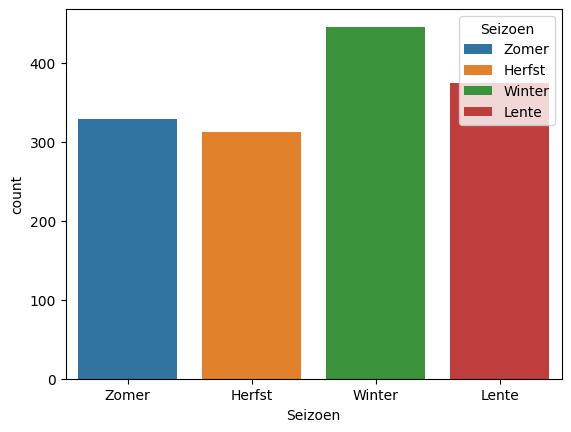

In [36]:
sns.countplot(data = df,x='Seizoen', hue = 'Seizoen')#, legend= False).set_title('Verdeling hoeveelheid GBS per seizoen')

In [37]:
Klimaat_Seizoen = pd.crosstab(df['klimaat'], df['Seizoen'])

stats.chi2_contingency(Klimaat_Seizoen)

Chi2ContingencyResult(statistic=3.7451420362510364, pvalue=0.9273719105102436, dof=9, expected_freq=array([[ 46.85372522,  56.13465482,  66.76281613,  49.24880383],
       [ 21.18045113,  25.37593985,  30.18045113,  22.26315789],
       [208.38140807, 249.6582365 , 296.92686261, 219.03349282],
       [ 36.58441558,  43.83116883,  52.12987013,  38.45454545]]))

De chi-kwadraat toets geeft een p-waarde van 0,9237.... dat is hoger dan 0,05. Dus de 0-hypothese wordt bewaard.
De 0 hypothese is dat de 2 variabelen statistisch onafhankelijk zijn.

# NA handling

Eerst kijken hoeveel NA er zijn in de dataset. Om te bepalen welke vorm van NA-handling wordt toegepast

In [ ]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

In [ ]:
df = df.dropna(thresh= df.shape[1]-10)
df

In [ ]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

In [ ]:
df[df['Ant_event'].isna() == False]['Ant_event'].count()

In [ ]:
df[df['Ant_event_GE'].isna() == False]['Ant_event_GE'].count()

In [ ]:
df['Ant_event_GE']

In [ ]:
df['Ant_event'].value_counts()

In [ ]:
df['Ant_event_GE'].isna().sum()

In [ ]:
df['Ant_event_GE'].value_counts()

In [ ]:
df['Ant_event_GE'] = df['Ant_event_GE'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [ ]:
df['Ant_event_GE'].isna().sum()

In [ ]:
df['Ant_event_GE'].value_counts()


In [ ]:
df['Ant_event_respiratory'] = df['Ant_event_respiratory'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [ ]:
df['Ant_event_vaccination'] = df['Ant_event_vaccination'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [ ]:
df['Ant_event_other'] = df['Ant_event_other'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [ ]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

In [ ]:
df_2  = df[['Able_to_walk_e','Able_to_walk_w1','Surv_unable_to_walk','Walking_again']]

In [ ]:
df_2

In [ ]:
df_lopers = df_2[df_2['Surv_unable_to_walk'] == 0]

In [ ]:
print(df_lopers['Able_to_walk_e'].value_counts(), '\n',
    df_lopers['Able_to_walk_w1'].value_counts(), '\n',
    df_lopers['Surv_unable_to_walk'].value_counts(), '\n',
    'walking_again', df_lopers['Walking_again'].value_counts())


In [ ]:
df_NietLopers = df_2[df_2['Surv_unable_to_walk'] == 1]

In [ ]:
df_NietLopers

In [ ]:
print(df['Able_to_walk_e'].value_counts(), '\n',
      df['Able_to_walk_w1'].value_counts())

In [ ]:
df['Able_to_walk_e'] = df['Able_to_walk_e'].fillna(df['Surv_unable_to_walk'].
                                               where(df['Surv_unable_to_walk'] == 0, other=pd.NA).replace(0, 1))

In [ ]:
df['Able_to_walk_w1'] = df['Able_to_walk_w1'].fillna(df['Surv_unable_to_walk'].
                                               where(df['Surv_unable_to_walk'] == 0, other=pd.NA).replace(0, 1))

In [ ]:
print(df['Able_to_walk_e'].value_counts(), '\n',
      df['Able_to_walk_w1'].value_counts())

In [ ]:
df['Surv_status'] = df['Surv_status'].fillna(0)

In [ ]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

# Toetsen

In [ ]:
freq_table = pd.crosstab(df['klimaat'], df['Seizoen']) 
freq_table

In [ ]:
df_A = df[df['klimaat'] == 'A Klimaat']
df_B = df[df['klimaat'] == 'B Klimaat']
df_C = df[df['klimaat'] == 'C Klimaat']
df_D = df[df['klimaat'] == 'D Klimaat']

In [ ]:
dataframes_klimaat = [df_A, df_B, df_C, df_D]
for i in dataframes_klimaat:
    print(i['klimaat'].value_counts()) 
    

Uit deze code is te zien dat alle klimaten op juiste wijze zijn gesplitst

In [ ]:
df_lente = df[df['Seizoen'] == 'Lente']
df_zomer = df[df['Seizoen'] == 'Zomer']
df_herfst = df[df['Seizoen'] == 'Herfst']
df_winter = df[df['Seizoen'] == 'Winter']

In [ ]:
dataframes_seizoen = [df_lente, df_zomer, df_herfst, df_winter]
for i in dataframes_seizoen:
    print(i['Seizoen'].value_counts()) 
    

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Deceased'], dateframe['Seizoen']) 
    print(freq_table, '\n')
  

Wat in deze tabel is te zien dat er te weinig waarden apart zijn om de chi-kwadraat toets uit te voeren, daarom wordt voor het geheel de chi-kwadraat en voor C klimaat de test uitgevoerd. Omdat dit geen 2 bij 2 matrices zijn mag de fishers exact toets ook niet worden uitgevoerd

In [ ]:
Seizoen_dood = pd.crosstab(df['Seizoen'], df['Deceased'])
stats.chi2_contingency(Seizoen_dood)

In [ ]:
Seizoen_dood = pd.crosstab(df_C['Seizoen'], df_C['Deceased'])
stats.chi2_contingency(Seizoen_dood)

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Surv_status'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Voor de surv_status geldt hetzelfde al voor deceaced

In [ ]:
Seizoen_surv_status = pd.crosstab(df['Seizoen'], df['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

In [ ]:
Seizoen_surv_status = pd.crosstab(df_C['Seizoen'], df_C['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

Ook kan nog worden gekozen om 2 weg te halen dat wordt hieronder gedaan, bij deceased is namelijk ook al gekeken of het overlijden afhankelijk was aan het seizoen

In [ ]:
df_survstatus = df
df_A_survstatus = df_A
df_B_survstatus = df_B
df_C_survstatus = df_C
df_D_survstatus = df_D

In [ ]:
df_survstatus = df_survstatus.drop(df_survstatus[df_survstatus['Surv_status'] == 2].index)
df_A_survstatus = df_A_survstatus.drop(df_A_survstatus[df_A_survstatus['Surv_status'] == 2].index)
df_B_survstatus = df_B_survstatus.drop(df_B_survstatus[df_B_survstatus['Surv_status'] == 2].index)
df_C_survstatus = df_C_survstatus.drop(df_C_survstatus[df_C_survstatus['Surv_status'] == 2].index)
df_D_survstatus = df_D_survstatus.drop(df_D_survstatus[df_D_survstatus['Surv_status'] == 2].index)

In [ ]:
Seizoen_surv_status = pd.crosstab(df_survstatus['Seizoen'], df_survstatus['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

In [ ]:
Seizoen_surv_status = pd.crosstab(df_A_survstatus['Seizoen'], df_A_survstatus['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

In [ ]:
Seizoen_surv_status = pd.crosstab(df_B_survstatus['Seizoen'], df_B_survstatus['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

In [ ]:
Seizoen_surv_status = pd.crosstab(df_C_survstatus['Seizoen'], df_C_survstatus['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

In [ ]:
Seizoen_surv_status = pd.crosstab(df_D_survstatus['Seizoen'], df_D_survstatus['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

Seizoen en surv_status zijn statistisch onafhankelijk

Algemene CNI

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

CNI Bulbular

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Bulbar_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Bulbar_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

CNI facial

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Facial_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Facial_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

CNI Oculomotor

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Oculomotor_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Oculomotor_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

In deze voorbeelden is te zien dat voor alle CNI evenementen niet genoeg waarden zijn bij de waarden van 2.0, nou is optie 2 niet mogelijk te bepalen, wat positief zou kunnen uitpakken. daarom worden die uit de dataset gehaald nu. Op de agemene CNI na komt de waarde 2.0 ook niet eens voor in dataset.

In [ ]:
df_CNI = df
df_A_CNI = df_A
df_B_CNI = df_B
df_C_CNI = df_C
df_D_CNI = df_D
CNI_var = ['CNI_e', 'CNI_w1', 'CNI_Bulbar_e', 'CNI_Facial_e', 'CNI_Oculomotor_e']

In [ ]:
for var in CNI_var:
    df_CNI = df_CNI.drop(df_CNI[df_CNI[var] == 2].index)
    df_A_CNI = df_A_CNI.drop(df_A_CNI[df_A_CNI[var] == 2].index)
    df_B_CNI = df_B_CNI.drop(df_B_CNI[df_B_CNI[var] == 2].index)
    df_C_CNI = df_C_CNI.drop(df_C_CNI[df_C_CNI[var] == 2].index)
    df_D_CNI = df_D_CNI.drop(df_D_CNI[df_D_CNI[var] == 2].index)

In [ ]:
df_CNI['CNI_w1'].unique()

In [ ]:
dataframes_CNI = [df_CNI, df_A_CNI, df_B_CNI, df_C_CNI, df_D_CNI]

In [ ]:
#for dateframe in dataframes_CNI:
#    freq_table = pd.crosstab(dateframe['CNI_Oculomotor_e'], dateframe['Seizoen']) 
#   print(freq_table, '\n')

In [ ]:
CNI_var_e = ['CNI_e', 'CNI_Bulbar_e', 'CNI_Facial_e', 'CNI_Oculomotor_e']
CNI_var_w1 = ['CNI_w1', 'CNI_Bulbar_w1', 'CNI_Facial_w1', 'CNI_Oculomotor_w1']

In [ ]:
for var in CNI_var_e:
    print(var, '\n')
    for dataframe in dataframes_CNI:
        Seizoen_CNI = pd.crosstab(dataframe['Seizoen'], dataframe[var])
        print(stats.chi2_contingency(Seizoen_CNI))

Hieruit is te zien dat CNI_Oculomotor_e voor alle klimaten samen en voor D klimaat statistisch significant afwijkt

In [ ]:
Seizoen_CNI = pd.crosstab(df_CNI['Seizoen'], df_CNI['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

In [ ]:
Seizoen_CNI = pd.crosstab(df_D_CNI['Seizoen'], df_D_CNI['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Week 1

In [ ]:
for var in CNI_var_w1:
    print(var, '\n')
    for dataframe in dataframes_CNI:
        Seizoen_CNI = pd.crosstab(dataframe['Seizoen'], dataframe[var])
        print(stats.chi2_contingency(Seizoen_CNI))

Echter is dit niet meer het geval na week 1

Post hoc voor CNI_Oculomotor_e met hele dataframe en klimaat D

Post hoc voor CNI

In [ ]:
df_CNI_LenZom = df_CNI[(df_CNI['Seizoen'] == 'Lente') | (df_CNI['Seizoen'] == 'Zomer')]
df_CNI_LenHer = df_CNI[(df_CNI['Seizoen'] == 'Lente') | (df_CNI['Seizoen'] == 'Herfst')]
df_CNI_LenWin = df_CNI[(df_CNI['Seizoen'] == 'Lente') | (df_CNI['Seizoen'] == 'Winter')]
df_CNI_ZomHer = df_CNI[(df_CNI['Seizoen'] == 'Zomer') | (df_CNI['Seizoen'] == 'Herfst')]
df_CNI_ZomWin = df_CNI[(df_CNI['Seizoen'] == 'Zomer') | (df_CNI['Seizoen'] == 'Winter')]
df_CNI_HerWin = df_CNI[(df_CNI['Seizoen'] == 'Herfst') | (df_CNI['Seizoen'] == 'Winter')]

df_D_CNI_LenZom = df_D_CNI[(df_D_CNI['Seizoen'] == 'Lente') | (df_D_CNI['Seizoen'] == 'Zomer')]
df_D_CNI_LenHer = df_D_CNI[(df_D_CNI['Seizoen'] == 'Lente') | (df_D_CNI['Seizoen'] == 'Herfst')]
df_D_CNI_LenWin = df_D_CNI[(df_D_CNI['Seizoen'] == 'Lente') | (df_D_CNI['Seizoen'] == 'Winter')]
df_D_CNI_ZomHer = df_D_CNI[(df_D_CNI['Seizoen'] == 'Zomer') | (df_D_CNI['Seizoen'] == 'Herfst')]
df_D_CNI_ZomWin = df_D_CNI[(df_D_CNI['Seizoen'] == 'Zomer') | (df_D_CNI['Seizoen'] == 'Winter')]
df_D_CNI_HerWin = df_D_CNI[(df_D_CNI['Seizoen'] == 'Herfst') | (df_D_CNI['Seizoen'] == 'Winter')]



Post hoc hele dataset

In [ ]:
Seizoen_CNI = pd.crosstab(df_CNI_LenZom['Seizoen'], df_CNI_LenZom['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

In [ ]:
Seizoen_CNI = pd.crosstab(df_CNI_LenHer['Seizoen'], df_CNI_LenHer['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

In [ ]:
Seizoen_CNI = pd.crosstab(df_CNI_LenWin['Seizoen'], df_CNI_LenWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

In [ ]:
Seizoen_CNI = pd.crosstab(df_CNI_ZomHer['Seizoen'], df_CNI_ZomHer['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

In [ ]:
Seizoen_CNI = pd.crosstab(df_CNI_ZomWin['Seizoen'], df_CNI_ZomWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

In [ ]:
Seizoen_CNI = pd.crosstab(df_CNI_HerWin['Seizoen'], df_CNI_HerWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Hieruit is te halen dat de herfst de lage p waarde gaf

Na bonferoni correctie is te concluderen dat het niet meer statistisch significant is

Post hoc voor klimaat D

In [ ]:
Seizoen_CNI = pd.crosstab(df_D_CNI_LenZom['Seizoen'], df_D_CNI_LenZom['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

In [ ]:
Seizoen_CNI = pd.crosstab(df_D_CNI_LenHer['Seizoen'], df_D_CNI_LenHer['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

In [ ]:
Seizoen_CNI = pd.crosstab(df_D_CNI_LenWin['Seizoen'], df_D_CNI_LenWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

In [ ]:
Seizoen_CNI = pd.crosstab(df_D_CNI_ZomHer['Seizoen'], df_D_CNI_ZomHer['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

In [ ]:
Seizoen_CNI = pd.crosstab(df_D_CNI_ZomWin['Seizoen'], df_D_CNI_ZomWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

In [ ]:
Seizoen_CNI = pd.crosstab(df_D_CNI_HerWin['Seizoen'], df_D_CNI_HerWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Hier is te zien dat dat alleen het geval is tussen de herfst en de lente

Na bonferoni correctie is te concluderen dat het niet meer statistisch significant is

Ant event variabelen testen

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Voor klimaat B en D zijn niet genoeg waarden, daarom worden de testen gedaan voor de datasets van alle klimate, klimaat A en klimaat C

In [ ]:
Seizoen_Ant_event = pd.crosstab(df['Seizoen'], df['Ant_event'])
stats.chi2_contingency(Seizoen_Ant_event)

In [ ]:
Seizoen_Ant_event = pd.crosstab(df_A['Seizoen'], df_A['Ant_event'])
stats.chi2_contingency(Seizoen_Ant_event)

In [ ]:
Seizoen_Ant_event = pd.crosstab(df_C['Seizoen'], df_C['Ant_event'])
stats.chi2_contingency(Seizoen_Ant_event)

Statistisch onafhankelijk in elk klimaat

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event_GE'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Voor klimaat B zijn niet genoeg waarden, daarom worden de testen gedaan voor de datasets van alle klimate, klimaat A, klimaat C en klimaat D

In [ ]:
Seizoen_Ant_event = pd.crosstab(df['Seizoen'], df['Ant_event_GE'])
stats.chi2_contingency(Seizoen_Ant_event)

In [ ]:
Seizoen_Ant_event = pd.crosstab(df_A['Seizoen'], df_A['Ant_event_GE'])
stats.chi2_contingency(Seizoen_Ant_event)

In [ ]:
Seizoen_Ant_event = pd.crosstab(df_C['Seizoen'], df_C['Ant_event_GE'])
stats.chi2_contingency(Seizoen_Ant_event)

In [ ]:
Seizoen_Ant_event = pd.crosstab(df_D['Seizoen'], df_D['Ant_event_GE'])
stats.chi2_contingency(Seizoen_Ant_event)

Statistisch onafhankelijk in elk klimaat

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event_respiratory'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Voor klimaat B zijn niet genoeg waarden, daarom worden de testen gedaan voor de datasets van alle klimate, klimaat A, klimaat C en klimaat D

In [ ]:
Seizoen_Ant_event = pd.crosstab(df['Seizoen'], df['Ant_event_respiratory'])
stats.chi2_contingency(Seizoen_Ant_event)

In [ ]:
Seizoen_Ant_event = pd.crosstab(df_A['Seizoen'], df_A['Ant_event_respiratory'])
stats.chi2_contingency(Seizoen_Ant_event)

In [ ]:
Seizoen_Ant_event = pd.crosstab(df_C['Seizoen'], df_C['Ant_event_respiratory'])
stats.chi2_contingency(Seizoen_Ant_event)

In [ ]:
Seizoen_Ant_event = pd.crosstab(df_D['Seizoen'], df_D['Ant_event_respiratory'])
stats.chi2_contingency(Seizoen_Ant_event)

Bij alle klimaten is het statistisch onafhankelijk 

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event_vaccination'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Zelfs alles samen is het niet genoeg waarden voor een chi-kwadraat toets :(

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event_other'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Alleen C heeft genoeg waarden, dus worden chi-kwadraat toetsen voor de hele dataset en voor het C klimaat uitgevoerd

In [ ]:
Seizoen_Ant_event = pd.crosstab(df['Seizoen'], df['Ant_event_other'])
stats.chi2_contingency(Seizoen_Ant_event)

In [ ]:
Seizoen_Ant_event = pd.crosstab(df_C['Seizoen'], df_C['Ant_event_other'])
stats.chi2_contingency(Seizoen_Ant_event)

Statistisch onafhankelijk

#### Able_to_walk_e

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Able_to_walk_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

In [ ]:
Seizoen_Able_to_walk_e = pd.crosstab(df['Able_to_walk_e'], df['Seizoen'])
stats.chi2_contingency(Seizoen_Able_to_walk_e)

In [ ]:
df_B_Able_to_walk_e = pd.crosstab(df_B['Able_to_walk_e'], df_B['Seizoen'])
stats.chi2_contingency(df_B_Able_to_walk_e)

In [ ]:
df_C_Able_to_walk_e = pd.crosstab(df_C['Able_to_walk_e'], df_C['Seizoen'])
stats.chi2_contingency(df_C_Able_to_walk_e)

In [ ]:
df_D_Able_to_walk_e = pd.crosstab(df_D['Able_to_walk_e'], df_D['Seizoen'])
stats.chi2_contingency(df_D_Able_to_walk_e)

#### Able_to_walk_w1

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Able_to_walk_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

In [ ]:
Seizoen_Able_to_walk_w1 = pd.crosstab(df['Able_to_walk_w1'], df['Seizoen'])
stats.chi2_contingency(Seizoen_Able_to_walk_w1)

In [ ]:
frequentietabellen=[]

for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['MRC_sum_e'], dateframe['Seizoen']) 
    frequentietabellen.append(freq_table)
    print(freq_table, '\n')

combined_freq_table = pd.concat(frequentietabellen)

combined_freq_table = combined_freq_table.groupby(combined_freq_table.index).sum()

combined_freq_table.plot(kind='bar', stacked=True).set_title('Seizoensverdeling MRC_sun_e over de seizoenen')


#### ANOVA uitvoeren

In [ ]:
df_mrc_e = df[['MRC_sum_e', 'Seizoen']]
model_1 = ols('MRC_sum_e ~ C(Seizoen)', data=df_mrc_e).fit()
anova_table = sm.stats.anova_lm(model_1, typ=2)
print(anova_table)

#### Residuen testen op normaliteit met shapiro-wilk toets en QQ-plot tekenen

In [ ]:
residuen = model_1.resid

print(stats.shapiro(residuen))

sm.qqplot(residuen, line = 's' )
# line = s =>standardized line, the expected order statistics are scaled by the standard deviation 
# of the given sample and have the mean added to them
# https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html
plt.title('QQ-plot van de reisduen')
plt.show()


Niet normaal verdeeld, kan geen anova uitvoeren, dus pair wise t-toets

#### MRC_sum_e

In [ ]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_mrc_e = df_lente['MRC_sum_e'].dropna()

In [ ]:
df_zomer = df[df['Seizoen']=='Zomer']
df_zomer_mrc_e = df_zomer['MRC_sum_e'].dropna()

In [ ]:
df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_mrc_e = df_herfst['MRC_sum_e'].dropna()

In [ ]:
df_winter = df[df['Seizoen']=='Winter']
df_winter_mrc_e = df_winter['MRC_sum_e'].dropna()

In [ ]:
stats.ttest_ind(df_lente_mrc_e, df_zomer_mrc_e)

In [ ]:
stats.ttest_ind(df_lente_mrc_e, df_herfst_mrc_e)

In [ ]:
stats.ttest_ind(df_lente_mrc_e, df_winter_mrc_e)

In [ ]:
stats.ttest_ind(df_zomer_mrc_e, df_herfst_mrc_e)

In [ ]:
stats.ttest_ind(df_zomer_mrc_e, df_winter_mrc_e)

In [ ]:
stats.ttest_ind(df_herfst_mrc_e, df_winter_mrc_e)

#### Klimaat A

In [ ]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_A = df_lente[df_lente['klimaat'] == 'A Klimaat']
df_lente_A_mrc_e = df_lente_A['MRC_sum_e'].dropna()

df_zomer = df[df['Seizoen']=='Zomer']
df_zomer_A = df_zomer[df_zomer['klimaat'] == 'A Klimaat']
df_zomer_A_mrc_e = df_zomer_A['MRC_sum_e'].dropna()

df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_A = df_herfst[df_herfst['klimaat'] == 'A Klimaat']
df_herfst_A_mrc_e = df_herfst_A['MRC_sum_e'].dropna()

df_winter = df[df['Seizoen']=='Winter']
df_winter_A = df_winter[df_winter['klimaat'] == 'A Klimaat']
df_winter_A_mrc_e = df_winter_A['MRC_sum_e'].dropna()

In [ ]:
stats.ttest_ind(df_lente_A_mrc_e, df_zomer_A_mrc_e)

In [ ]:
stats.ttest_ind(df_lente_A_mrc_e, df_herfst_A_mrc_e)

In [ ]:
stats.ttest_ind(df_lente_A_mrc_e, df_winter_A_mrc_e)

In [ ]:
stats.ttest_ind(df_zomer_A_mrc_e, df_herfst_A_mrc_e)

In [ ]:
stats.ttest_ind(df_zomer_A_mrc_e, df_winter_A_mrc_e)

In [ ]:
stats.ttest_ind(df_herfst_A_mrc_e, df_winter_A_mrc_e)

#### Klimaat B

In [ ]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_B = df_lente[df_lente['klimaat'] == 'B Klimaat']
df_lente_B_mrc_e = df_lente_B['MRC_sum_e'].dropna()

df_zomer = df[df['Seizoen']=='Zomer']
df_lente_B = df_zomer[df_zomer['klimaat'] == 'B Klimaat']
df_zomer_B_mrc_e = df_lente_B['MRC_sum_e'].dropna()

df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_B = df_herfst[df_herfst['klimaat'] == 'B Klimaat']
df_herfst_B_mrc_e = df_herfst_B['MRC_sum_e'].dropna()

df_winter = df[df['Seizoen']=='Winter']
df_winter_B = df_winter[df_winter['klimaat'] == 'B Klimaat']
df_winter_B_mrc_e = df_winter_B['MRC_sum_e'].dropna()

In [ ]:
stats.ttest_ind(df_lente_B_mrc_e, df_zomer_B_mrc_e)

In [ ]:
stats.ttest_ind(df_lente_B_mrc_e, df_herfst_B_mrc_e)

In [ ]:
stats.ttest_ind(df_lente_B_mrc_e, df_winter_B_mrc_e)

In [ ]:
stats.ttest_ind(df_zomer_B_mrc_e, df_herfst_B_mrc_e)

In [ ]:
stats.ttest_ind(df_zomer_B_mrc_e, df_winter_B_mrc_e)

In [ ]:
stats.ttest_ind(df_herfst_B_mrc_e, df_winter_B_mrc_e)

#### Klimaat C

In [ ]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_C = df_lente[df_lente['klimaat'] == 'C Klimaat']
df_lente_C_mrc_e = df_lente_C['MRC_sum_e'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_C = df_zomer[df_zomer['klimaat'] == 'C Klimaat']
df_zomer_C_mrc_e = df_zomer_C['MRC_sum_e'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_C = df_herfst[df_herfst['klimaat'] == 'C Klimaat']
df_herfst_C_mrc_e = df_herfst_C['MRC_sum_e'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_C = df_winter[df_winter['klimaat'] == 'C Klimaat']
df_winter_C_mrc_e = df_winter_C['MRC_sum_e'].dropna()

In [ ]:
stats.ttest_ind(df_lente_C_mrc_e, df_zomer_C_mrc_e)

In [ ]:
stats.ttest_ind(df_lente_C_mrc_e, df_herfst_C_mrc_e)

In [ ]:
stats.ttest_ind(df_lente_C_mrc_e, df_winter_C_mrc_e)

In [ ]:
stats.ttest_ind(df_zomer_C_mrc_e, df_herfst_C_mrc_e)

In [ ]:
stats.ttest_ind(df_zomer_C_mrc_e, df_winter_C_mrc_e)

In [ ]:
stats.ttest_ind(df_herfst_C_mrc_e, df_winter_C_mrc_e)

#### Klimaat D

In [ ]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_D = df_lente[df_lente['klimaat'] == 'D Klimaat']
df_lente_D_mrc_e = df_lente_D['MRC_sum_e'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_D = df_zomer[df_zomer['klimaat'] == 'D Klimaat']
df_zomer_D_mrc_e = df_zomer_D['MRC_sum_e'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_D = df_herfst[df_herfst['klimaat'] == 'D Klimaat']
df_herfst_D_mrc_e = df_herfst_D['MRC_sum_e'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_D = df_winter[df_winter['klimaat'] == 'D Klimaat']
df_winter_D_mrc_e = df_winter_D['MRC_sum_e'].dropna()

In [ ]:
stats.ttest_ind(df_lente_D_mrc_e, df_zomer_D_mrc_e)

In [ ]:
stats.ttest_ind(df_lente_D_mrc_e, df_herfst_D_mrc_e)

In [ ]:
stats.ttest_ind(df_lente_D_mrc_e, df_winter_D_mrc_e)

In [ ]:
stats.ttest_ind(df_zomer_D_mrc_e, df_herfst_D_mrc_e)

In [ ]:
stats.ttest_ind(df_zomer_D_mrc_e, df_winter_D_mrc_e)

In [ ]:
stats.ttest_ind(df_herfst_D_mrc_e, df_winter_D_mrc_e)

#### MRC_sum_w1

In [ ]:
df_mrc_w1 = df[['MRC_sum_w1', 'Seizoen']]
model_2 = ols('MRC_sum_w1 ~ C(Seizoen)', data=df_mrc_w1).fit()
anova_table = sm.stats.anova_lm(model_2, typ=2)
print(anova_table)

In [ ]:
residuen = model_2.resid
print(stats.shapiro(residuen))


sm.qqplot(residuen, line = 's' )
plt.title('QQ-plot van de reisduen')
plt.show()

In [ ]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_mrc_w1 = df_lente['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen']=='Zomer']
df_zomer_mrc_w1 = df_zomer['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_mrc_w1 = df_herfst['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen']=='Winter']
df_winter_mrc_w1 = df_winter['MRC_sum_w1'].dropna()

In [ ]:
stats.ttest_ind(df_lente_mrc_w1, df_zomer_mrc_w1)

In [ ]:
stats.ttest_ind(df_lente_mrc_w1, df_herfst_mrc_w1)

In [ ]:
stats.ttest_ind(df_lente_mrc_w1, df_winter_mrc_w1)

In [ ]:
stats.ttest_ind(df_zomer_mrc_w1, df_herfst_mrc_w1)

In [ ]:
stats.ttest_ind(df_zomer_mrc_w1, df_winter_mrc_w1)

In [ ]:
stats.ttest_ind(df_herfst_mrc_w1, df_winter_mrc_w1)

#### klimaat A

In [ ]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_A = df_lente[df_lente['klimaat'] == 'A Klimaat']
df_lente_A_mrc_w1 = df_lente_A['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen']=='Zomer']
df_zomer_A = df_zomer[df_zomer['klimaat'] == 'A Klimaat']
df_zomer_A_mrc_w1 = df_zomer_A['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_A = df_herfst[df_herfst['klimaat'] == 'A Klimaat']
df_herfst_A_mrc_w1 = df_herfst_A['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen']=='Winter']
df_winter_A = df_winter[df_winter['klimaat'] == 'A Klimaat']
df_winter_A_mrc_w1 = df_winter_A['MRC_sum_w1'].dropna()

In [ ]:
stats.ttest_ind(df_lente_A_mrc_w1, df_zomer_A_mrc_w1)

In [ ]:
stats.ttest_ind(df_lente_A_mrc_w1, df_herfst_A_mrc_w1)

In [ ]:
stats.ttest_ind(df_lente_A_mrc_w1, df_winter_A_mrc_w1)

In [ ]:
stats.ttest_ind(df_zomer_A_mrc_w1, df_herfst_A_mrc_w1)

In [ ]:
stats.ttest_ind(df_zomer_A_mrc_w1, df_winter_A_mrc_w1)

In [ ]:
stats.ttest_ind(df_herfst_A_mrc_w1, df_winter_A_mrc_w1)

#### klimaat B

In [ ]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_B = df_lente[df_lente['klimaat'] == 'B Klimaat']
df_lente_B_mrc_w1 = df_lente_B['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_B = df_zomer[df_zomer['klimaat'] == 'B Klimaat']
df_zomer_B_mrc_w1 = df_zomer_B['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_B = df_herfst[df_herfst['klimaat'] == 'B Klimaat']
df_herfst_B_mrc_w1 = df_herfst_B['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_B = df_winter[df_winter['klimaat'] == 'B Klimaat']
df_winter_B_mrc_w1 = df_winter_B['MRC_sum_w1'].dropna()

In [ ]:
stats.ttest_ind(df_lente_B_mrc_w1, df_zomer_B_mrc_w1)

In [ ]:
stats.ttest_ind(df_lente_B_mrc_w1, df_herfst_B_mrc_w1)

In [ ]:
stats.ttest_ind(df_lente_B_mrc_w1, df_winter_B_mrc_w1)

In [ ]:
stats.ttest_ind(df_zomer_B_mrc_w1, df_herfst_B_mrc_w1)

In [ ]:
stats.ttest_ind(df_zomer_B_mrc_w1, df_winter_B_mrc_w1)

In [ ]:
stats.ttest_ind(df_herfst_B_mrc_w1, df_winter_B_mrc_w1)

#### klimaat C

In [ ]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_C = df_lente[df_lente['klimaat'] == 'C Klimaat']
df_lente_C_mrc_w1 = df_lente_C['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_C = df_zomer[df_zomer['klimaat'] == 'C Klimaat']
df_zomer_C_mrc_w1 = df_zomer_C['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_C = df_herfst[df_herfst['klimaat'] == 'C Klimaat']
df_herfst_C_mrc_w1 = df_herfst_C['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_C = df_winter[df_winter['klimaat'] == 'C Klimaat']
df_winter_C_mrc_w1 = df_winter_C['MRC_sum_w1'].dropna()

In [ ]:
stats.ttest_ind(df_lente_C_mrc_w1, df_zomer_C_mrc_w1)

In [ ]:
stats.ttest_ind(df_lente_C_mrc_w1, df_herfst_C_mrc_w1)

In [ ]:
stats.ttest_ind(df_lente_C_mrc_w1, df_winter_C_mrc_w1)

In [ ]:
stats.ttest_ind(df_zomer_C_mrc_w1, df_herfst_C_mrc_w1)

In [ ]:
stats.ttest_ind(df_zomer_C_mrc_w1, df_winter_C_mrc_w1)

In [ ]:
stats.ttest_ind(df_herfst_C_mrc_w1, df_winter_C_mrc_w1)

#### klimaat D

In [ ]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_D = df_lente[df_lente['klimaat'] == 'D Klimaat']
df_lente_D_mrc_w1 = df_lente_D['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_D = df_zomer[df_zomer['klimaat'] == 'D Klimaat']
df_zomer_D_mrc_w1 = df_zomer_D['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_D = df_herfst[df_herfst['klimaat'] == 'D Klimaat']
df_herfst_D_mrc_w1 = df_herfst_D['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_D = df_winter[df_winter['klimaat'] == 'D Klimaat']
df_winter_D_mrc_w1 = df_winter_D['MRC_sum_w1'].dropna()

In [ ]:
stats.ttest_ind(df_lente_D_mrc_w1, df_zomer_D_mrc_w1)

In [ ]:
stats.ttest_ind(df_lente_D_mrc_w1, df_herfst_D_mrc_w1)

In [ ]:
stats.ttest_ind(df_lente_D_mrc_w1, df_winter_D_mrc_w1)

In [ ]:
stats.ttest_ind(df_zomer_D_mrc_w1, df_herfst_D_mrc_w1)

In [ ]:
stats.ttest_ind(df_zomer_D_mrc_w1, df_winter_D_mrc_w1)

In [ ]:
stats.ttest_ind(df_herfst_D_mrc_w1, df_winter_D_mrc_w1)

#### GBSDS_e

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['GBSDS_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

In [ ]:
freq_table = pd.crosstab(df['GBSDS_e'], df['Seizoen']) 
freq_table

In [ ]:
df_GBSDS_e = df
df_C_GBSDS_e = df_C

In [ ]:
df_GBSDS_e = df_GBSDS_e.drop(df_GBSDS_e[df_GBSDS_e['GBSDS_e'] == 0].index)
df_C_GBSDS_e = df_C_GBSDS_e.drop(df_C_GBSDS_e[df_C_GBSDS_e['GBSDS_e'] == 0].index)

In [ ]:
df_GBSDS_e_seizoen = pd.crosstab(df_GBSDS_e['GBSDS_e'], df_GBSDS_e['Seizoen'])
stats.chi2_contingency(df_GBSDS_e_seizoen)

In [ ]:
df_C_GBSDS_e_seizoen = pd.crosstab(df_C_GBSDS_e['GBSDS_e'], df_C_GBSDS_e['Seizoen'])
stats.chi2_contingency(df_C_GBSDS_e_seizoen)

#### GBSDS_w1

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['GBSDS_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

In [ ]:
freq_table = pd.crosstab(df['GBSDS_w1'], df['Seizoen']) 
freq_table

In [ ]:
df_GBSDS_w1 = df
df_C_GBSDS_w1 = df_C

In [ ]:
df_GBSDS_w1 = df_GBSDS_w1.drop(df_GBSDS_w1[df_GBSDS_w1['GBSDS_w1'] == 0].index)
df_C_GBSDS_w1 = df_C_GBSDS_w1.drop(df_C_GBSDS_w1[df_C_GBSDS_w1['GBSDS_w1'] == 0].index)

In [ ]:
df_GBSDS_w1_seizoen = pd.crosstab(df_GBSDS_w1['GBSDS_w1'], df_GBSDS_w1['Seizoen'])
stats.chi2_contingency(df_GBSDS_w1_seizoen)

In [ ]:
df_C_GBSDS_w1_seizoen = pd.crosstab(df_C_GBSDS_w1['GBSDS_w1'], df_C_GBSDS_w1['Seizoen'])
stats.chi2_contingency(df_C_GBSDS_w1_seizoen)

#### Surv_unable_to_walk

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Surv_unable_to_walk'], dateframe['Seizoen']) 
    print(freq_table, '\n')

In [ ]:
df_Surv_unable_to_walk = pd.crosstab(df['Surv_unable_to_walk'], df['Seizoen'])
stats.chi2_contingency(df_Surv_unable_to_walk)

In [ ]:
df_B_Surv_unable_to_walk = pd.crosstab(df_B['Surv_unable_to_walk'], df_B['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk)

In [ ]:
df_C_Surv_unable_to_walk = pd.crosstab(df_C['Surv_unable_to_walk'], df_C['Seizoen'])
stats.chi2_contingency(df_C_Surv_unable_to_walk)

Post hoc voor df_B_Surv_unable_to_walk

In [ ]:
df_B_LenZom = df_B[(df_B['Seizoen'] == 'Lente') | (df_B['Seizoen'] == 'Zomer')]
df_B_LenHer = df_B[(df_B['Seizoen'] == 'Lente') | (df_B['Seizoen'] == 'Herfst')]
df_B_LenWin = df_B[(df_B['Seizoen'] == 'Lente') | (df_B['Seizoen'] == 'Winter')]
df_B_ZomHer = df_B[(df_B['Seizoen'] == 'Zomer') | (df_B['Seizoen'] == 'Herfst')]
df_B_ZomWin = df_B[(df_B['Seizoen'] == 'Zomer') | (df_B['Seizoen'] == 'Winter')]
df_B_HerWin = df_B[(df_B['Seizoen'] == 'Herfst') | (df_B['Seizoen'] == 'Winter')]

In [ ]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_LenZom['Surv_unable_to_walk'], df_B_LenZom['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

In [ ]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_LenHer['Surv_unable_to_walk'], df_B_LenHer['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

In [ ]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_LenWin['Surv_unable_to_walk'], df_B_LenWin['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

In [ ]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_ZomHer['Surv_unable_to_walk'], df_B_ZomHer['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

In [ ]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_ZomWin['Surv_unable_to_walk'], df_B_ZomWin['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

In [ ]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_HerWin['Surv_unable_to_walk'], df_B_HerWin['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

De statistische afhankelijkheid is te zien tussen de winter en zomer

Na bonferoni correctie is te concluderen dat het niet meer statistisch significant is

In [ ]:
df['CSF_protein_level'].unique()


In [ ]:
df['Surv_days'].unique()


In [ ]:
df['Days_between_onset_and_admission'].unique()


In [ ]:
sns.histplot(data = df, x='Age', kde = True, hue="Seizoen", element="step", multiple = 'stack')

In [ ]:
df['Sex'] = df['Sex'].replace({0: 'Vrouw', 1: 'Man'})
sns.countplot(data = df, x='Sex', hue="Seizoen", hue_order = ['Lente', 'Zomer', 'Herfst', 'Winter'])

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Sex'], dateframe['Seizoen']) 
    print(freq_table, '\n')

In [ ]:
Sex_seizoen = pd.crosstab(df['Sex'], df['Seizoen'])
stats.chi2_contingency(Sex_seizoen)

In [ ]:
Sex_seizoen = pd.crosstab(df_A['Sex'], df_A['Seizoen'])
stats.chi2_contingency(Sex_seizoen)

In [ ]:
Sex_seizoen = pd.crosstab(df_C['Sex'], df_C['Seizoen'])
stats.chi2_contingency(Sex_seizoen)

In [ ]:
Sex_seizoen = pd.crosstab(df_C['Sex'], df_C['Seizoen'])
stats.chi2_contingency(Sex_seizoen)

Pijn

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Pain_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Pain_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Genoeg waarden voor een chi kwadraat toets

Entry

In [ ]:
Pain_seizoen = pd.crosstab(df['Pain_e'], df['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

In [ ]:
Pain_seizoen = pd.crosstab(df_A['Pain_e'], df_A['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

In [ ]:
Pain_seizoen = pd.crosstab(df_B['Pain_e'], df_B['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

In [ ]:
Pain_seizoen = pd.crosstab(df_C['Pain_e'], df_C['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

In [ ]:
Pain_seizoen = pd.crosstab(df_D['Pain_e'], df_D['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

Week 1

In [ ]:
Pain_seizoen = pd.crosstab(df['Pain_w1'], df['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

In [ ]:
Pain_seizoen = pd.crosstab(df_A['Pain_w1'], df_A['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

In [ ]:
Pain_seizoen = pd.crosstab(df_B['Pain_w1'], df_B['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

In [ ]:
Pain_seizoen = pd.crosstab(df_C['Pain_w1'], df_C['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

In [ ]:
Pain_seizoen = pd.crosstab(df_D['Pain_w1'], df_D['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

Het seizoen en de pijn die mensen voelen zijn statistisch onafhankelijk

Sens deficits

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Sens_deficits_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Sens_deficits_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Vaak is de waarde 2 te weinig gegeven voor een chi kwadraat toets, sinds in het codeboek ook niet staat wat de waarde 2 inhoudt is besloten deze weg te houden

In [ ]:
df_Sens_deficits_e = df
df_A_Sens_deficits_e = df_A
df_B_Sens_deficits_e = df_B
df_C_Sens_deficits_e = df_C
df_D_Sens_deficits_e = df_D

df_Sens_deficits_w1 = df
df_A_Sens_deficits_w1 = df_A
df_B_Sens_deficits_w1 = df_B
df_C_Sens_deficits_w1 = df_C
df_D_Sens_deficits_w1 = df_D

In [ ]:
df_Sens_deficits_e = df_Sens_deficits_e.drop(df_Sens_deficits_e[df_Sens_deficits_e['Sens_deficits_e'] == 2].index)
df_A_Sens_deficits_e = df_A_Sens_deficits_e.drop(df_A_Sens_deficits_e[df_A_Sens_deficits_e['Sens_deficits_e'] == 2].index)
df_B_Sens_deficits_e = df_B_Sens_deficits_e.drop(df_B_Sens_deficits_e[df_B_Sens_deficits_e['Sens_deficits_e'] == 2].index)
df_C_Sens_deficits_e = df_C_Sens_deficits_e.drop(df_C_Sens_deficits_e[df_C_Sens_deficits_e['Sens_deficits_e'] == 2].index)
df_D_Sens_deficits_e = df_D_Sens_deficits_e.drop(df_D_Sens_deficits_e[df_D_Sens_deficits_e['Sens_deficits_e'] == 2].index)

df_Sens_deficits_w1 = df_Sens_deficits_w1.drop(df_Sens_deficits_w1[df_Sens_deficits_w1['Sens_deficits_w1'] == 2].index)
df_A_Sens_deficits_w1 = df_A_Sens_deficits_w1.drop(df_A_Sens_deficits_w1[df_A_Sens_deficits_w1['Sens_deficits_w1'] == 2].index)
df_B_Sens_deficits_w1 = df_B_Sens_deficits_w1.drop(df_B_Sens_deficits_w1[df_B_Sens_deficits_w1['Sens_deficits_w1'] == 2].index)
df_C_Sens_deficits_w1 = df_C_Sens_deficits_w1.drop(df_C_Sens_deficits_w1[df_C_Sens_deficits_w1['Sens_deficits_w1'] == 2].index)
df_D_Sens_deficits_w1 = df_D_Sens_deficits_w1.drop(df_D_Sens_deficits_w1[df_D_Sens_deficits_w1['Sens_deficits_w1'] == 2].index)

De toetsen

Entry

In [ ]:
SensDef_seizoen = pd.crosstab(df_Sens_deficits_e['Sens_deficits_e'], df_Sens_deficits_e['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

In [ ]:
SensDef_seizoen = pd.crosstab(df_A_Sens_deficits_e['Sens_deficits_e'], df_A_Sens_deficits_e['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

In [ ]:
SensDef_seizoen = pd.crosstab(df_B_Sens_deficits_e['Sens_deficits_e'], df_B_Sens_deficits_e['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

In [ ]:
SensDef_seizoen = pd.crosstab(df_C_Sens_deficits_e['Sens_deficits_e'], df_C_Sens_deficits_e['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

In [ ]:
SensDef_seizoen = pd.crosstab(df_D_Sens_deficits_e['Sens_deficits_e'], df_D_Sens_deficits_e['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

Week 1

In [ ]:
SensDef_seizoen = pd.crosstab(df_Sens_deficits_w1['Sens_deficits_w1'], df_Sens_deficits_w1['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

In [ ]:
SensDef_seizoen = pd.crosstab(df_A_Sens_deficits_w1['Sens_deficits_w1'], df_A_Sens_deficits_w1['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

In [ ]:
SensDef_seizoen = pd.crosstab(df_B_Sens_deficits_w1['Sens_deficits_w1'], df_B_Sens_deficits_w1['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

In [ ]:
SensDef_seizoen = pd.crosstab(df_C_Sens_deficits_w1['Sens_deficits_w1'], df_C_Sens_deficits_w1['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

In [ ]:
SensDef_seizoen = pd.crosstab(df_D_Sens_deficits_w1['Sens_deficits_w1'], df_D_Sens_deficits_w1['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

Comorbidity_respiration

In [ ]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Comorbidity_respiration'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Alleen voor klimaat C genoeg dus chi kwadraat voor C en hele dataset

In [ ]:
ComRes_seizoen = pd.crosstab(df['Comorbidity_respiration'], df['Seizoen'])
stats.chi2_contingency(ComRes_seizoen)

In [ ]:
ComRes_seizoen = pd.crosstab(df_C['Comorbidity_respiration'], df_C['Seizoen'])
stats.chi2_contingency(ComRes_seizoen)

#### Subset gemaakt met Surv_status vs Surv_days

In [ ]:
df['Surv_status'] = df['Surv_status'].replace({0: 'lost_to_follow_up', 1: 'in_staat_om_zelfstandig_te_lopen', 2: 'Overleden'})
mean_surv_days = df['Surv_days'].groupby([df['Seizoen'], df['Surv_status']]).mean().reset_index()

In [ ]:
mean_surv_days

In [ ]:
sns.barplot(data = mean_surv_days, y='Surv_days', x="Seizoen", hue = 'Surv_status',
            hue_order = ['lost_to_follow_up','in_staat_om_zelfstandig_te_lopen','Overleden'])

In [ ]:
sns.catplot(data=mean_surv_days, kind='bar', x='Seizoen', y='Surv_days', 
            col='Surv_status', hue='Seizoen', 
            order=['Lente', 'Zomer', 'Herfst', 'Winter'])

In [ ]:
lost_to_follow_up = df[df['Surv_status'] == 'lost_to_follow_up']
in_staat_om_zelfstandig_te_lopen = df[df['Surv_status'] == 'in_staat_om_zelfstandig_te_lopen']
overleden = df[df['Surv_status'] == 'Overleden']

In [ ]:
lost_to_follow_up = lost_to_follow_up[['Surv_days', 'Seizoen','klimaat']]
model_3 = ols('Surv_days ~ C(Seizoen)', data=lost_to_follow_up).fit()
anova_table = sm.stats.anova_lm(model_3, typ=2)
print(anova_table)

In [ ]:
residuen = model_3.resid
print(stats.shapiro(residuen))

sm.qqplot(residuen, line = 's' )
plt.title('QQ-plot van de reisduen')
plt.show()

##### Niet voldoen aan normaliteit, dus pairwise t-toets

In [ ]:
lente_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Lente']
lente_status_0 = lente_status_0['Surv_days'].dropna()

zomer_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Zomer']
zomer_status_0 = zomer_status_0['Surv_days'].dropna()

herfst_status_0  = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Herfst']
herfst_status_0  = herfst_status_0 ['Surv_days'].dropna()

winter_status_0  = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Winter']
winter_status_0  = winter_status_0 ['Surv_days'].dropna()

In [ ]:
print('t-toets op groepen lente_status_0  en zomer_status_0 :' , stats.ttest_ind(lente_status_0 ,zomer_status_0 ))
print('t-toets op groepen lente_status_0  en herfst_status_0 :' ,stats.ttest_ind(lente_status_0 ,herfst_status_0 ))
print('t-toets op groepen lente_status_0  en winter_status_0 :' ,stats.ttest_ind(lente_status_0 ,winter_status_0 ))
print('t-toets op groepen zomer_status_0  en herfst_status_0 :' ,stats.ttest_ind(zomer_status_0 ,herfst_status_0 ))
print('t-toets op groepen zomer_status_0  en winter_status_0 :' ,stats.ttest_ind(zomer_status_0 ,winter_status_0 ))
print('t-toets op groepen herfst_status_0  en winter_status_0 :' ,stats.ttest_ind(herfst_status_0 ,winter_status_0 ))

In [ ]:
lost_to_follow_up['Seizoen'].groupby(lost_to_follow_up['klimaat']).value_counts()

klimaat A

In [ ]:
lente_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Lente']
lente_status_0_A = lente_status_0[lente_status_0['klimaat'] == 'A Klimaat']
lente_status_0_A = lente_status_0_A['Surv_days'].dropna()

zomer_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Zomer']
zomer_status_0_A = zomer_status_0[zomer_status_0['klimaat'] == 'A Klimaat']
zomer_status_0_A = zomer_status_0_A['Surv_days'].dropna()

herfst_status_0  = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Herfst']
herfst_status_0_A = herfst_status_0[herfst_status_0['klimaat'] == 'A Klimaat']
herfst_status_0_A  = herfst_status_0_A ['Surv_days'].dropna()

winter_status_0  = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Winter']
winter_status_0_A = winter_status_0[winter_status_0['klimaat'] == 'A Klimaat']
winter_status_0_A  = winter_status_0_A ['Surv_days'].dropna()

In [ ]:
print('t-toets op groepen lente_status_0_A  en zomer_status_0_A :' , stats.ttest_ind(lente_status_0_A ,zomer_status_0_A ))
print('t-toets op groepen lente_status_0_A  en herfst_status_0_A :' ,stats.ttest_ind(lente_status_0_A ,herfst_status_0_A ))
print('t-toets op groepen lente_status_0_A  en winter_status_0_A :' ,stats.ttest_ind(lente_status_0_A ,winter_status_0_A ))
print('t-toets op groepen zomer_status_0_A  en herfst_status_0_A :' ,stats.ttest_ind(zomer_status_0_A ,herfst_status_0_A ))
print('t-toets op groepen zomer_status_0_A  en winter_status_0_A :' ,stats.ttest_ind(zomer_status_0_A ,winter_status_0_A ))
print('t-toets op groepen herfst_status_0_A  en winter_status_0_A :' ,stats.ttest_ind(herfst_status_0_A ,winter_status_0_A ))

klimaat B

In [ ]:
lente_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Lente']
lente_status_0_B = lente_status_0[lente_status_0['klimaat'] == 'B Klimaat']
lente_status_0_B = lente_status_0_B['Surv_days'].dropna()

zomer_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Zomer']
zomer_status_0_B = zomer_status_0[zomer_status_0['klimaat'] == 'B Klimaat']
zomer_status_0_B = zomer_status_0_B['Surv_days'].dropna()

herfst_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Herfst']
herfst_status_0_B = herfst_status_0[herfst_status_0['klimaat'] == 'B Klimaat']
herfst_status_0_B = herfst_status_0_B['Surv_days'].dropna()

winter_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Winter']
winter_status_0_B = winter_status_0[winter_status_0['klimaat'] == 'B Klimaat']
winter_status_0_B = winter_status_0_B['Surv_days'].dropna()


In [ ]:
print('t-toets op groepen lente_status_0_B en zomer_status_0_B :' , stats.ttest_ind(lente_status_0_B, zomer_status_0_B))
print('t-toets op groepen lente_status_0_B en herfst_status_0_B :' , stats.ttest_ind(lente_status_0_B, herfst_status_0_B))
print('t-toets op groepen lente_status_0_B en winter_status_0_B :' , stats.ttest_ind(lente_status_0_B, winter_status_0_B))
print('t-toets op groepen zomer_status_0_B en herfst_status_0_B :' , stats.ttest_ind(zomer_status_0_B, herfst_status_0_B))
print('t-toets op groepen zomer_status_0_B en winter_status_0_B :' , stats.ttest_ind(zomer_status_0_B, winter_status_0_B))
print('t-toets op groepen herfst_status_0_B en winter_status_0_B :' , stats.ttest_ind(herfst_status_0_B, winter_status_0_B))


Klimaat C

In [ ]:
lente_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Lente']
lente_status_0_C = lente_status_0[lente_status_0['klimaat'] == 'C Klimaat']
lente_status_0_C = lente_status_0_C['Surv_days'].dropna()

zomer_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Zomer']
zomer_status_0_C = zomer_status_0[zomer_status_0['klimaat'] == 'C Klimaat']
zomer_status_0_C = zomer_status_0_C['Surv_days'].dropna()

herfst_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Herfst']
herfst_status_0_C = herfst_status_0[herfst_status_0['klimaat'] == 'C Klimaat']
herfst_status_0_C = herfst_status_0_C['Surv_days'].dropna()

winter_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Winter']
winter_status_0_C = winter_status_0[winter_status_0['klimaat'] == 'C Klimaat']
winter_status_0_C = winter_status_0_C['Surv_days'].dropna()


In [ ]:
print('t-toets op groepen lente_status_0_C en zomer_status_0_C :' , stats.ttest_ind(lente_status_0_C, zomer_status_0_C))
print('t-toets op groepen lente_status_0_C en herfst_status_0_C :' , stats.ttest_ind(lente_status_0_C, herfst_status_0_C))
print('t-toets op groepen lente_status_0_C en winter_status_0_C :' , stats.ttest_ind(lente_status_0_C, winter_status_0_C))
print('t-toets op groepen zomer_status_0_C en herfst_status_0_C :' , stats.ttest_ind(zomer_status_0_C, herfst_status_0_C))
print('t-toets op groepen zomer_status_0_C en winter_status_0_C :' , stats.ttest_ind(zomer_status_0_C, winter_status_0_C))
print('t-toets op groepen herfst_status_0_C en winter_status_0_C :' , stats.ttest_ind(herfst_status_0_C, winter_status_0_C))


Klimaat D

In [ ]:
lente_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Lente']
lente_status_0_D = lente_status_0[lente_status_0['klimaat'] == 'D Klimaat']
lente_status_0_D = lente_status_0_D['Surv_days'].dropna()

zomer_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Zomer']
zomer_status_0_D = zomer_status_0[zomer_status_0['klimaat'] == 'D Klimaat']
zomer_status_0_D = zomer_status_0_D['Surv_days'].dropna()

herfst_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Herfst']
herfst_status_0_D = herfst_status_0[herfst_status_0['klimaat'] == 'D Klimaat']
herfst_status_0_D = herfst_status_0_D['Surv_days'].dropna()

winter_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Winter']
winter_status_0_D = winter_status_0[winter_status_0['klimaat'] == 'D Klimaat']
winter_status_0_D = winter_status_0_D['Surv_days'].dropna()


In [ ]:
print('t-toets op groepen lente_status_0_D en zomer_status_0_D :' , stats.ttest_ind(lente_status_0_D, zomer_status_0_D))
print('t-toets op groepen lente_status_0_D en herfst_status_0_D :' , stats.ttest_ind(lente_status_0_D, herfst_status_0_D))
print('t-toets op groepen lente_status_0_D en winter_status_0_D :' , stats.ttest_ind(lente_status_0_D, winter_status_0_D))
print('t-toets op groepen zomer_status_0_D en herfst_status_0_D :' , stats.ttest_ind(zomer_status_0_D, herfst_status_0_D))
print('t-toets op groepen zomer_status_0_D en winter_status_0_D :' , stats.ttest_ind(zomer_status_0_D, winter_status_0_D))
print('t-toets op groepen herfst_status_0_D en winter_status_0_D :' , stats.ttest_ind(herfst_status_0_D, winter_status_0_D))


#### in_staat_om_zelfstandig_te_lopen

In [ ]:
in_staat_om_zelfstandig_te_lopen = in_staat_om_zelfstandig_te_lopen[['Surv_days', 'Seizoen','klimaat']]
model_4 = ols('Surv_days ~ C(Seizoen)', data=in_staat_om_zelfstandig_te_lopen).fit()
anova_table = sm.stats.anova_lm(model_4, typ=2)
print(anova_table)

In [ ]:
residuen = model_4.resid
print(stats.shapiro(residuen))

sm.qqplot(residuen, line = 's' )
plt.title('QQ-plot van de reisduen')
plt.show()

In [ ]:
lente_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Lente']
lente_status_1 = lente_status_1['Surv_days'].dropna()

zomer_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Zomer']
zomer_status_1 = zomer_status_1['Surv_days'].dropna()

herfst_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Herfst']
herfst_status_1 = herfst_status_1['Surv_days'].dropna()

winter_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Winter']
winter_status_1 = winter_status_1['Surv_days'].dropna()

In [ ]:
print('t-toets op groepen lente_status_1 en zomer_status_1:' , stats.ttest_ind(lente_status_1,zomer_status_1))
print('t-toets op groepen lente_status_1 en herfst_status_1:' ,stats.ttest_ind(lente_status_1,herfst_status_1))
print('t-toets op groepen lente_status_1 en winter_status_1:' ,stats.ttest_ind(lente_status_1,winter_status_1))
print('t-toets op groepen zomer_status_1 en herfst_status_1:' ,stats.ttest_ind(zomer_status_1,herfst_status_1))
print('t-toets op groepen zomer_status_1 en winter_status_1:' ,stats.ttest_ind(zomer_status_1,winter_status_1))
print('t-toets op groepen herfst_status_1 en winter_status_1:' ,stats.ttest_ind(herfst_status_1,winter_status_1))

In [ ]:
in_staat_om_zelfstandig_te_lopen['Seizoen'].groupby(in_staat_om_zelfstandig_te_lopen['klimaat']).value_counts()

klimaat A

In [ ]:
lente_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Lente']
lente_status_1_A = lente_status_1[lente_status_1['klimaat'] == 'A Klimaat']
lente_status_1_A = lente_status_1_A['Surv_days'].dropna()

zomer_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Zomer']
zomer_status_1_A = zomer_status_1[zomer_status_1['klimaat'] == 'A Klimaat']
zomer_status_1_A = zomer_status_1_A['Surv_days'].dropna()

herfst_status_1  = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Herfst']
herfst_status_1_A = herfst_status_1[herfst_status_1['klimaat'] == 'A Klimaat']
herfst_status_1_A  = herfst_status_1_A ['Surv_days'].dropna()

winter_status_1  = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Winter']
winter_status_1_A = winter_status_1[winter_status_1['klimaat'] == 'A Klimaat']
winter_status_1_A  = winter_status_1_A ['Surv_days'].dropna()

In [ ]:
print('t-toets op groepen lente_status_1_A  en zomer_status_1_A :' , stats.ttest_ind(lente_status_1_A ,zomer_status_1_A ))
print('t-toets op groepen lente_status_1_A  en herfst_status_1_A :' ,stats.ttest_ind(lente_status_1_A ,herfst_status_1_A ))
print('t-toets op groepen lente_status_1_A  en winter_status_1_A :' ,stats.ttest_ind(lente_status_1_A ,winter_status_1_A ))
print('t-toets op groepen zomer_status_1_A  en herfst_status_1_A :' ,stats.ttest_ind(zomer_status_1_A ,herfst_status_1_A ))
print('t-toets op groepen zomer_status_1_A  en winter_status_1_A :' ,stats.ttest_ind(zomer_status_1_A ,winter_status_1_A ))
print('t-toets op groepen herfst_status_1_A  en winter_status_1_A :' ,stats.ttest_ind(herfst_status_1_A ,winter_status_1_A ))

klimaat B

In [ ]:
lente_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Lente']
lente_status_1_B = lente_status_1[lente_status_1['klimaat'] == 'B Klimaat']
lente_status_1_B = lente_status_1_B['Surv_days'].dropna()

zomer_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Zomer']
zomer_status_1_B = zomer_status_1[zomer_status_1['klimaat'] == 'B Klimaat']
zomer_status_1_B = zomer_status_1_B['Surv_days'].dropna()

herfst_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Herfst']
herfst_status_1_B = herfst_status_1[herfst_status_1['klimaat'] == 'B Klimaat']
herfst_status_1_B = herfst_status_1_B['Surv_days'].dropna()

winter_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Winter']
winter_status_1_B = winter_status_1[winter_status_1['klimaat'] == 'B Klimaat']
winter_status_1_B = winter_status_1_B['Surv_days'].dropna()


In [ ]:
print('t-toets op groepen lente_status_1_B en zomer_status_1_B :' , stats.ttest_ind(lente_status_1_B, zomer_status_1_B))
print('t-toets op groepen lente_status_1_B en herfst_status_1_B :' , stats.ttest_ind(lente_status_1_B, herfst_status_1_B))
print('t-toets op groepen lente_status_1_B en winter_status_1_B :' , stats.ttest_ind(lente_status_1_B, winter_status_1_B))
print('t-toets op groepen zomer_status_1_B en herfst_status_1_B :' , stats.ttest_ind(zomer_status_1_B, herfst_status_1_B))
print('t-toets op groepen zomer_status_1_B en winter_status_1_B :' , stats.ttest_ind(zomer_status_1_B, winter_status_1_B))
print('t-toets op groepen herfst_status_1_B en winter_status_1_B :' , stats.ttest_ind(herfst_status_1_B, winter_status_1_B))


klimaat C

In [ ]:
lente_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Lente']
lente_status_1_C = lente_status_1[lente_status_1['klimaat'] == 'C Klimaat']
lente_status_1_C = lente_status_1_C['Surv_days'].dropna()

zomer_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Zomer']
zomer_status_1_C = zomer_status_1[zomer_status_1['klimaat'] == 'C Klimaat']
zomer_status_1_C = zomer_status_1_C['Surv_days'].dropna()

herfst_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Herfst']
herfst_status_1_C = herfst_status_1[herfst_status_1['klimaat'] == 'C Klimaat']
herfst_status_1_C = herfst_status_1_C['Surv_days'].dropna()

winter_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Winter']
winter_status_1_C = winter_status_1[winter_status_1['klimaat'] == 'C Klimaat']
winter_status_1_C = winter_status_1_C['Surv_days'].dropna()


In [ ]:
print('t-toets op groepen lente_status_1_C en zomer_status_1_C :' , stats.ttest_ind(lente_status_1_C, zomer_status_1_C))
print('t-toets op groepen lente_status_1_C en herfst_status_1_C :' , stats.ttest_ind(lente_status_1_C, herfst_status_1_C))
print('t-toets op groepen lente_status_1_C en winter_status_1_C :' , stats.ttest_ind(lente_status_1_C, winter_status_1_C))
print('t-toets op groepen zomer_status_1_C en herfst_status_1_C :' , stats.ttest_ind(zomer_status_1_C, herfst_status_1_C))
print('t-toets op groepen zomer_status_1_C en winter_status_1_C :' , stats.ttest_ind(zomer_status_1_C, winter_status_1_C))
print('t-toets op groepen herfst_status_1_C en winter_status_1_C :' , stats.ttest_ind(herfst_status_1_C, winter_status_1_C))


klimaat D

In [ ]:
lente_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Lente']
lente_status_1_D = lente_status_1[lente_status_1['klimaat'] == 'D Klimaat']
lente_status_1_D = lente_status_1_D['Surv_days'].dropna()

zomer_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Zomer']
zomer_status_1_D = zomer_status_1[zomer_status_1['klimaat'] == 'D Klimaat']
zomer_status_1_D = zomer_status_1_D['Surv_days'].dropna()

herfst_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Herfst']
herfst_status_1_D = herfst_status_1[herfst_status_1['klimaat'] == 'D Klimaat']
herfst_status_1_D = herfst_status_1_D['Surv_days'].dropna()

winter_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Winter']
winter_status_1_D = winter_status_1[winter_status_1['klimaat'] == 'D Klimaat']
winter_status_1_D = winter_status_1_D['Surv_days'].dropna()


In [ ]:
print('t-toets op groepen lente_status_1_D en zomer_status_1_D :' , stats.ttest_ind(lente_status_1_D, zomer_status_1_D))
print('t-toets op groepen lente_status_1_D en herfst_status_1_D :' , stats.ttest_ind(lente_status_1_D, herfst_status_1_D))
print('t-toets op groepen lente_status_1_D en winter_status_1_D :' , stats.ttest_ind(lente_status_1_D, winter_status_1_D))
print('t-toets op groepen zomer_status_1_D en herfst_status_1_D :' , stats.ttest_ind(zomer_status_1_D, herfst_status_1_D))
print('t-toets op groepen zomer_status_1_D en winter_status_1_D :' , stats.ttest_ind(zomer_status_1_D, winter_status_1_D))
print('t-toets op groepen herfst_status_1_D en winter_status_1_D :' , stats.ttest_ind(herfst_status_1_D, winter_status_1_D))


#### overleden

In [ ]:
overleden = overleden[['Surv_days', 'Seizoen','klimaat']]
model_5 = ols('Surv_days ~ C(Seizoen)', data=overleden).fit()
anova_table = sm.stats.anova_lm(model_5, typ=2)
print(anova_table)

In [ ]:
residuen = model_5.resid
print(stats.shapiro(residuen))

sm.qqplot(residuen, line = 's' )
plt.title('QQ-plot van de reisduen')
plt.show()

Voldoet niet aan normaliteit, dus er zullen t toetsen gedaan worden

In [ ]:
lente_status_2 = overleden[overleden['Seizoen'] == 'Lente']
lente_status_2 = lente_status_2['Surv_days'].dropna()

zomer_status_2 = overleden[overleden['Seizoen'] == 'Zomer']
zomer_status_2 = zomer_status_2['Surv_days'].dropna()

herfst_status_2  = overleden[overleden['Seizoen'] == 'Herfst']
herfst_status_2  = herfst_status_2 ['Surv_days'].dropna()

winter_status_2  = overleden[overleden['Seizoen'] == 'Winter']
winter_status_2  = winter_status_2 ['Surv_days'].dropna()

In [ ]:
print('t-toets op groepen lente_status_2  en zomer_status_2 :' , stats.ttest_ind(lente_status_2 ,zomer_status_2 ))
print('t-toets op groepen lente_status_2  en herfst_status_2 :' ,stats.ttest_ind(lente_status_2 ,herfst_status_2 ))
print('t-toets op groepen lente_status_2  en winter_status_2 :' ,stats.ttest_ind(lente_status_2 ,winter_status_2 ))
print('t-toets op groepen zomer_status_2  en herfst_status_2 :' ,stats.ttest_ind(zomer_status_2 ,herfst_status_2 ))
print('t-toets op groepen zomer_status_2  en winter_status_2 :' ,stats.ttest_ind(zomer_status_2 ,winter_status_2 ))
print('t-toets op groepen herfst_status_2  en winter_status_2 :' ,stats.ttest_ind(herfst_status_2 ,winter_status_2 ))

In [ ]:
overleden['Seizoen'].groupby(overleden['klimaat']).value_counts()

Voor een Anova heb je minimaal 3 waarden nodig. Voor klimaat B en D kunnen er dus geen toetsen worden uitgevoerd. Voor klimaat A Kunnen Herfst en Zomer vergeken worden
en voor klimaat C alles

Klimaat A


In [ ]:
zomer_status_2 = overleden[overleden['Seizoen'] == 'Zomer']
zomer_status_2_A = zomer_status_2[zomer_status_2['klimaat'] == 'A Klimaat']
zomer_status_2_A = zomer_status_2_A['Surv_days'].dropna()

herfst_status_2  = overleden[overleden['Seizoen'] == 'Herfst']
herfst_status_2_A = herfst_status_2[herfst_status_2['klimaat'] == 'A Klimaat']
herfst_status_2_A  = herfst_status_2_A ['Surv_days'].dropna()


In [ ]:
print('t-toets op groepen zomer_status_2_A  en herfst_status_2_A :' ,stats.ttest_ind(zomer_status_2_A ,herfst_status_2_A ))

Klimaat C

In [ ]:
lente_status_2 = overleden[overleden['Seizoen'] == 'Lente']
lente_status_2_C = lente_status_2[lente_status_2['klimaat'] == 'C Klimaat']
lente_status_2_C = lente_status_2_C['Surv_days'].dropna()

zomer_status_2 = overleden[overleden['Seizoen'] == 'Zomer']
zomer_status_2_C = zomer_status_2[zomer_status_2['klimaat'] == 'C Klimaat']
zomer_status_2_C = zomer_status_2_C['Surv_days'].dropna()

herfst_status_2  = overleden[overleden['Seizoen'] == 'Herfst']
herfst_status_2_C = herfst_status_2[herfst_status_2['klimaat'] == 'C Klimaat']
herfst_status_2_C  = herfst_status_2_C ['Surv_days'].dropna()

winter_status_2  = overleden[overleden['Seizoen'] == 'Winter']
winter_status_2_C = winter_status_2[winter_status_2['klimaat'] == 'C Klimaat']
winter_status_2_C  = winter_status_2_C ['Surv_days'].dropna()

In [ ]:
print('t-toets op groepen lente_status_2_C  en zomer_status_2_C :' , stats.ttest_ind(lente_status_2_C ,zomer_status_2_C ))
print('t-toets op groepen lente_status_2_C  en herfst_status_2_C :' ,stats.ttest_ind(lente_status_2_C ,herfst_status_2_C ))
print('t-toets op groepen lente_status_2_C  en winter_status_2_C :' ,stats.ttest_ind(lente_status_2_C ,winter_status_2_C ))
print('t-toets op groepen zomer_status_2_C  en herfst_status_2_C :' ,stats.ttest_ind(zomer_status_2_C ,herfst_status_2_C ))
print('t-toets op groepen zomer_status_2_C  en winter_status_2_C :' ,stats.ttest_ind(zomer_status_2_C ,winter_status_2_C ))
print('t-toets op groepen herfst_status_2_C en winter_status_2_C :' ,stats.ttest_ind(herfst_status_2_C ,winter_status_2_C ))

#### CSF_protein_level

In [ ]:
df_csf = df[['CSF_protein_level', 'Seizoen', 'klimaat']]
model_6 = ols('CSF_protein_level ~ C(Seizoen)', data=df_csf).fit()
anova_table = sm.stats.anova_lm(model_6, typ=2)
print(anova_table)


In [ ]:
residuen = model_6.resid
print(stats.shapiro(residuen))

sm.qqplot(residuen, line = 's' )
plt.title('QQ-plot van de reisduen')
plt.show()

In [ ]:
sns.boxplot(data=df_csf, x="CSF_protein_level", y="Seizoen")

In [ ]:
Q1 = df_csf['CSF_protein_level'].quantile(0.0)
Q3 = df_csf['CSF_protein_level'].quantile(0.95)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliners = df_csf[(df_csf['CSF_protein_level'] < Q1 - threshold * IQR) | (df_csf['CSF_protein_level'] > Q3 + threshold * IQR)]

In [ ]:
uitbijters = outliners['CSF_protein_level']

In [ ]:
for i in uitbijters:
    df_csf = df_csf.drop(df_csf[df_csf['CSF_protein_level'] == i].index)

##### outliner van csf_protein_level verwijderen

In [ ]:
df_csf

In [ ]:
sns.boxplot(data=df_csf, x="CSF_protein_level", y="Seizoen")

In [ ]:
model_7 = ols('CSF_protein_level ~ C(Seizoen)', data=df_csf).fit()
anova_table = sm.stats.anova_lm(model_7, typ=2)
print(anova_table)


In [ ]:
residuen = model_7.resid
print(stats.shapiro(residuen))

sm.qqplot(residuen, line = 's' )
plt.title('QQ-plot van de reisduen')
plt.show()

Anova mag niet vanwege gebrek aan normaliteit

In [ ]:
lente_csf = df_csf[df_csf['Seizoen'] == 'Lente']
lente_csf = lente_csf['CSF_protein_level'].dropna()

zomer_csf = df_csf[df_csf['Seizoen'] == 'Zomer']
zomer_csf = zomer_csf['CSF_protein_level'].dropna()

herfst_csf  = df_csf[df_csf['Seizoen'] == 'Herfst']
herfst_csf  = herfst_csf['CSF_protein_level'].dropna()

winter_csf  = df_csf[df_csf['Seizoen'] == 'Winter']
winter_csf  = winter_csf['CSF_protein_level'].dropna()

In [ ]:
print('t-toets op groepen lente_csf  en zomer_csf :' , stats.ttest_ind(lente_csf ,zomer_csf ))
print('t-toets op groepen lente_csf  en herfst_csf :' ,stats.ttest_ind(lente_csf ,herfst_csf ))
print('t-toets op groepen lente_csf  en winter_csf :' ,stats.ttest_ind(lente_csf ,winter_csf ))
print('t-toets op groepen zomer_csf  en herfst_csf :' ,stats.ttest_ind(zomer_csf ,herfst_csf ))
print('t-toets op groepen zomer_csf  en winter_csf :' ,stats.ttest_ind(zomer_csf ,winter_csf ))
print('t-toets op groepen herfst_csf  en winter_csf :' ,stats.ttest_ind(herfst_csf ,winter_csf ))

In [ ]:
df_csf['Seizoen'].groupby(df_csf['klimaat']).value_counts()

Nu voor elk klimaat 

Klimaat A

In [ ]:
lente_csf = df_csf[df_csf['Seizoen'] == 'Lente']
lente_csf_A = lente_csf[lente_csf['klimaat'] == 'A Klimaat']
lente_csf_A = lente_csf_A['CSF_protein_level'].dropna()

zomer_csf = df_csf[df_csf['Seizoen'] == 'Zomer']
zomer_csf_A = zomer_csf[zomer_csf['klimaat'] == 'A Klimaat']
zomer_csf_A = zomer_csf_A['CSF_protein_level'].dropna()

herfst_csf  = df_csf[df_csf['Seizoen'] == 'Herfst']
herfst_csf_A = herfst_csf[herfst_csf['klimaat'] == 'A Klimaat']
herfst_csf_A  = herfst_csf_A ['CSF_protein_level'].dropna()

winter_csf  = df_csf[df_csf['Seizoen'] == 'Winter']
winter_csf_A = winter_csf[winter_csf['klimaat'] == 'A Klimaat']
winter_csf_A  = winter_csf_A ['CSF_protein_level'].dropna()

In [ ]:
print('t-toets op groepen lente_csf_A  en zomer_csf_A :' , stats.ttest_ind(lente_csf_A ,zomer_csf_A ))
print('t-toets op groepen lente_csf_A  en herfst_csf_A :' ,stats.ttest_ind(lente_csf_A ,herfst_csf_A ))
print('t-toets op groepen lente_csf_A  en winter_csf_A :' ,stats.ttest_ind(lente_csf_A ,winter_csf_A ))
print('t-toets op groepen zomer_csf_A  en herfst_csf_A :' ,stats.ttest_ind(zomer_csf_A ,herfst_csf_A ))
print('t-toets op groepen zomer_csf_A  en winter_csf_A :' ,stats.ttest_ind(zomer_csf_A ,winter_csf_A ))
print('t-toets op groepen herfst_csf_A  en winter_csf_A :' ,stats.ttest_ind(herfst_csf_A ,winter_csf_A ))

Klimaat B

In [ ]:
lente_csf = df_csf[df_csf['Seizoen'] == 'Lente']
lente_csf_B = lente_csf[lente_csf['klimaat'] == 'B Klimaat']
lente_csf_B = lente_csf_B['CSF_protein_level'].dropna()

zomer_csf = df_csf[df_csf['Seizoen'] == 'Zomer']
zomer_csf_B = zomer_csf[zomer_csf['klimaat'] == 'B Klimaat']
zomer_csf_B = zomer_csf_B['CSF_protein_level'].dropna()

herfst_csf  = df_csf[df_csf['Seizoen'] == 'Herfst']
herfst_csf_B = herfst_csf[herfst_csf['klimaat'] == 'B Klimaat']
herfst_csf_B  = herfst_csf_B ['CSF_protein_level'].dropna()

winter_csf  = df_csf[df_csf['Seizoen'] == 'Winter']
winter_csf_B = winter_csf[winter_csf['klimaat'] == 'B Klimaat']
winter_csf_B  = winter_csf_B ['CSF_protein_level'].dropna()

In [ ]:
print('t-toets op groepen lente_csf_B  en zomer_csf_B :' , stats.ttest_ind(lente_csf_B ,zomer_csf_B ))
print('t-toets op groepen lente_csf_B  en herfst_csf_B :' ,stats.ttest_ind(lente_csf_B ,herfst_csf_B ))
print('t-toets op groepen lente_csf_B  en winter_csf_B :' ,stats.ttest_ind(lente_csf_B ,winter_csf_B ))
print('t-toets op groepen zomer_csf_B  en herfst_csf_B :' ,stats.ttest_ind(zomer_csf_B ,herfst_csf_B ))
print('t-toets op groepen zomer_csf_B  en winter_csf_B :' ,stats.ttest_ind(zomer_csf_B ,winter_csf_B ))
print('t-toets op groepen herfst_csf_B  en winter_csf_B :' ,stats.ttest_ind(herfst_csf_B ,winter_csf_B ))

Klimaat C

In [ ]:
lente_csf = df_csf[df_csf['Seizoen'] == 'Lente']
lente_csf_C = lente_csf[lente_csf['klimaat'] == 'C Klimaat']
lente_csf_C = lente_csf_C['CSF_protein_level'].dropna()

zomer_csf = df_csf[df_csf['Seizoen'] == 'Zomer']
zomer_csf_C = zomer_csf[zomer_csf['klimaat'] == 'C Klimaat']
zomer_csf_C = zomer_csf_C['CSF_protein_level'].dropna()

herfst_csf  = df_csf[df_csf['Seizoen'] == 'Herfst']
herfst_csf_C = herfst_csf[herfst_csf['klimaat'] == 'C Klimaat']
herfst_csf_C  = herfst_csf_C['CSF_protein_level'].dropna()

winter_csf  = df_csf[df_csf['Seizoen'] == 'Winter']
winter_csf_C = winter_csf[winter_csf['klimaat'] == 'C Klimaat']
winter_csf_C  = winter_csf_C['CSF_protein_level'].dropna()

In [ ]:
print('t-toets op groepen lente_csf_C  en zomer_csf_C :' , stats.ttest_ind(lente_csf_C ,zomer_csf_C ))
print('t-toets op groepen lente_csf_C  en herfst_csf_C :' ,stats.ttest_ind(lente_csf_C ,herfst_csf_C ))
print('t-toets op groepen lente_csf_C  en winter_csf_C :' ,stats.ttest_ind(lente_csf_C ,winter_csf_C ))
print('t-toets op groepen zomer_csf_C  en herfst_csf_C :' ,stats.ttest_ind(zomer_csf_C ,herfst_csf_C ))
print('t-toets op groepen zomer_csf_C  en winter_csf_C :' ,stats.ttest_ind(zomer_csf_C ,winter_csf_C ))
print('t-toets op groepen herfst_csf_C  en winter_csf_C :' ,stats.ttest_ind(herfst_csf_C ,winter_csf_C ))

Klimaat D

In [ ]:
lente_csf = df_csf[df_csf['Seizoen'] == 'Lente']
lente_csf_D = lente_csf[lente_csf['klimaat'] == 'D Klimaat']
lente_csf_D = lente_csf_D['CSF_protein_level'].dropna()

zomer_csf = df_csf[df_csf['Seizoen'] == 'Zomer']
zomer_csf_D = zomer_csf[zomer_csf['klimaat'] == 'D Klimaat']
zomer_csf_D = zomer_csf_D['CSF_protein_level'].dropna()

herfst_csf  = df_csf[df_csf['Seizoen'] == 'Herfst']
herfst_csf_D = herfst_csf[herfst_csf['klimaat'] == 'D Klimaat']
herfst_csf_D  = herfst_csf_D['CSF_protein_level'].dropna()

winter_csf  = df_csf[df_csf['Seizoen'] == 'Winter']
winter_csf_D = winter_csf[winter_csf['klimaat'] == 'D Klimaat']
winter_csf_D  = winter_csf_D['CSF_protein_level'].dropna()

In [ ]:
print('t-toets op groepen lente_csf_D  en zomer_csf_D :' , stats.ttest_ind(lente_csf_D ,zomer_csf_D ))
print('t-toets op groepen lente_csf_D  en herfst_csf_D :' ,stats.ttest_ind(lente_csf_D ,herfst_csf_D ))
print('t-toets op groepen lente_csf_D  en winter_csf_D :' ,stats.ttest_ind(lente_csf_D ,winter_csf_D ))
print('t-toets op groepen zomer_csf_D  en herfst_csf_D :' ,stats.ttest_ind(zomer_csf_D ,herfst_csf_D ))
print('t-toets op groepen zomer_csf_D  en winter_csf_D :' ,stats.ttest_ind(zomer_csf_D ,winter_csf_D ))
print('t-toets op groepen herfst_csf_D  en winter_csf_D :' ,stats.ttest_ind(herfst_csf_D ,winter_csf_D ))